**Exploratory Data Analysis**

  Tabular Data
* Numerical features
 * line plot, hist plot, box plot, scatter plot
* Categorical Features: convert to numerical values
 * bar plot, pie plot


In [1]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()

Mounted at /content/drive


Saving cars.csv to cars.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cars.csv')
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


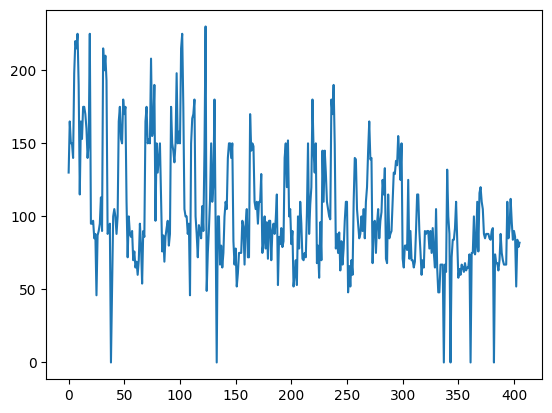

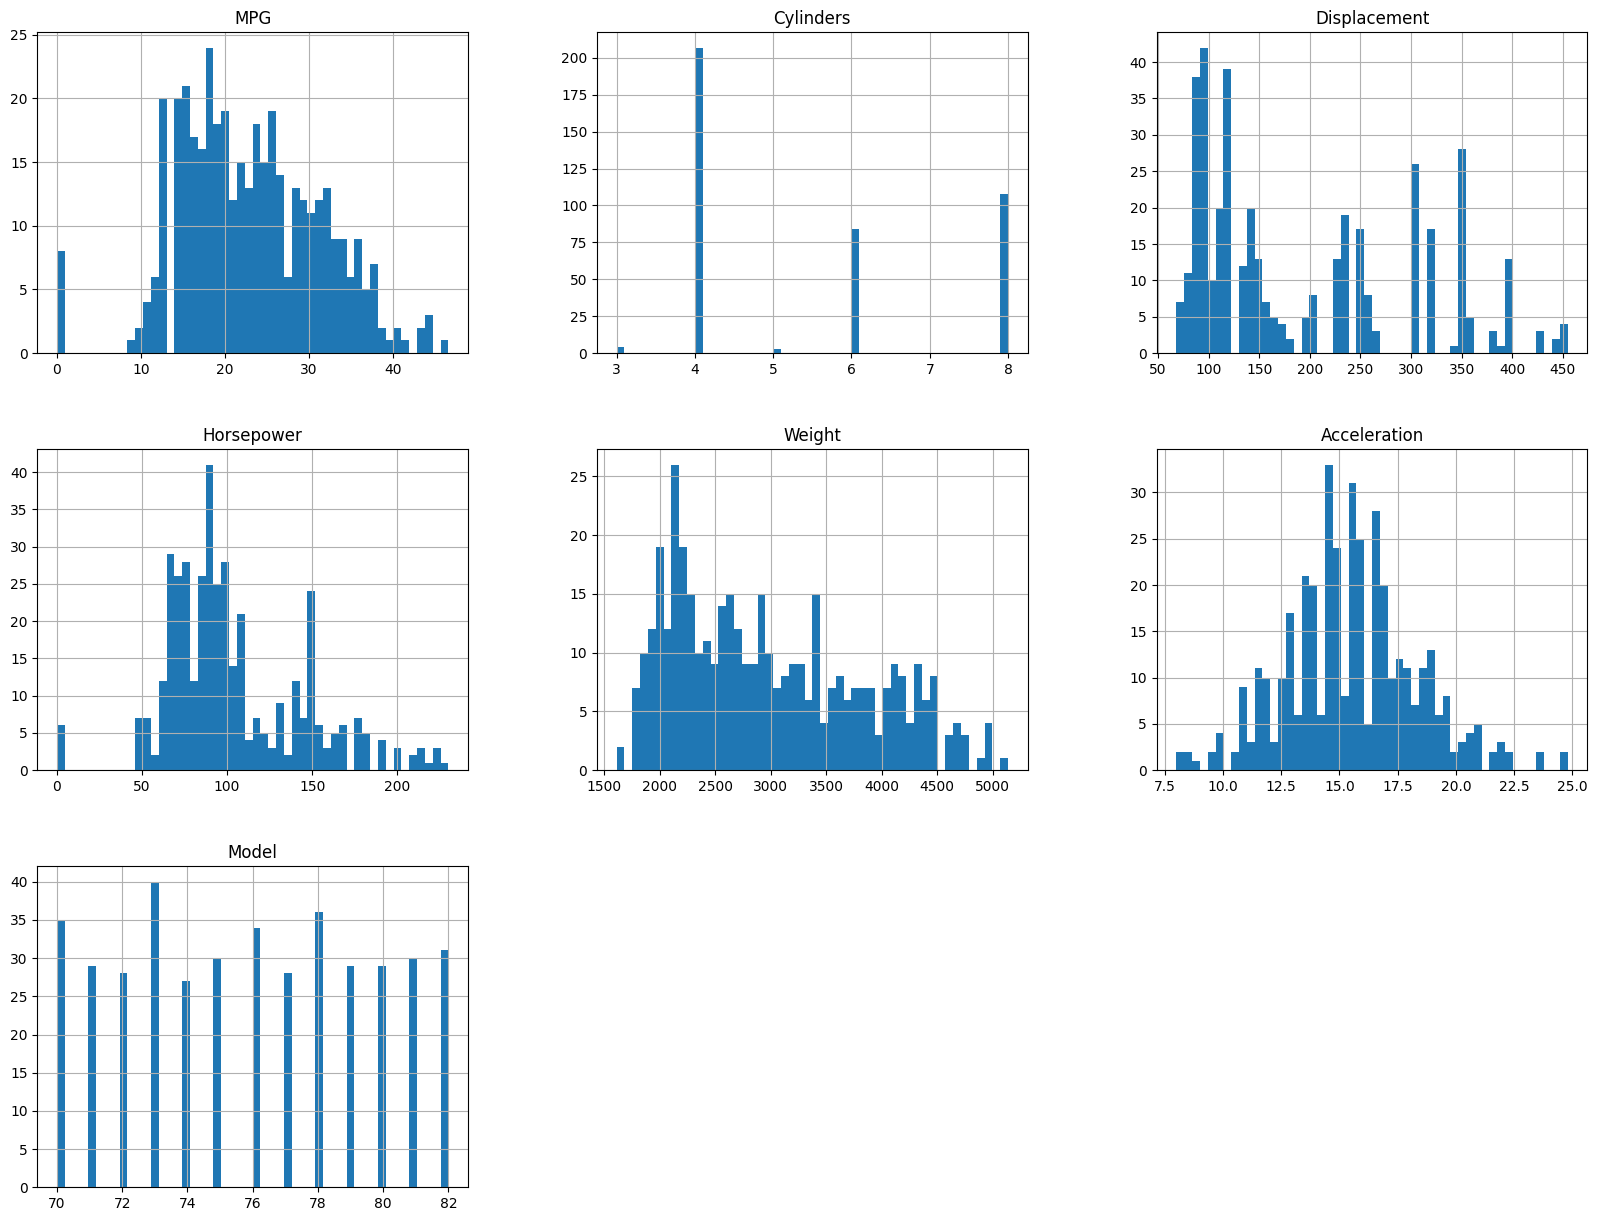

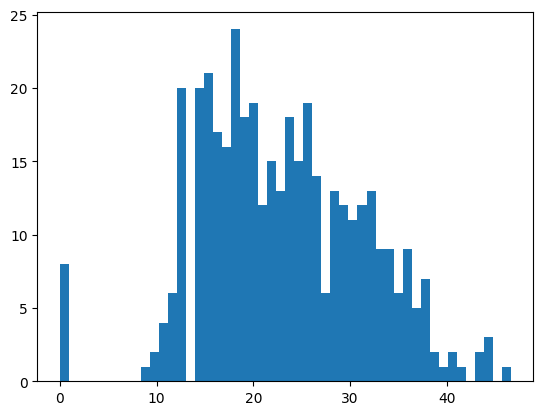

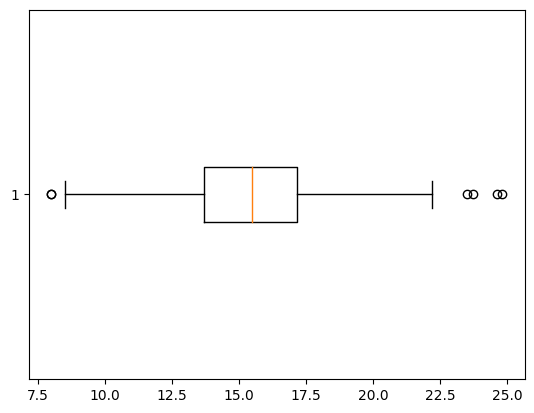

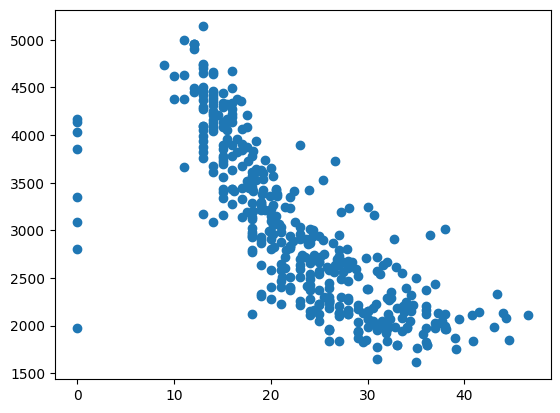

In [4]:
#line plot
plt.plot(df['Horsepower'])
plt.show()

#histogram
df.hist(bins=50, figsize=(20,15)) #number of bins: number of intervals
plt.show()

plt.hist(df['MPG'], bins=50)
plt.show()

#box & whisker plot
plt.boxplot(df['Acceleration'], vert=False)
plt.show()

#scatter plot
plt.scatter(df['MPG'], df['Weight'])
plt.show()

* `Long tail distribution`: Most data values fall far from the center of the distribution (use median value to predict)

* `Non-long tail distribution` (use median or mean)

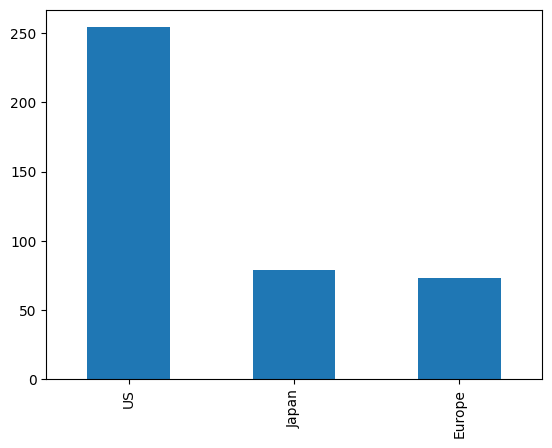

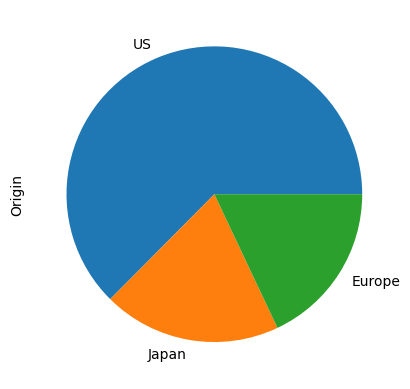

In [5]:
#Categorical features

#bar plot
df = pd.read_csv('cars.csv')
df['Origin'].value_counts().plot(kind = 'bar')
plt.show()

#pie plot
df['Origin'].value_counts().plot(kind = 'pie')
plt.show()

Temporal Data
* trend, seasonality || stock prices, temperature
 * line plot

Spatial Data
* changes over space || latitude, longitude
 * scatter plot

Graph Data
* networks
 * nodes

In [6]:
#Graph data (networks):

import networkx as nx

G = nx.erdos_renyi_graph(20, 0.4)

print(G.number_of_nodes())
print(G.number_of_edges())
print(G.degree([1,2]))

20
75
[(1, 6), (2, 9)]


Numerical features
*   Missing items can be assigned the median or mean value



Find & fill missing values

In [7]:
# Find missing values

df = pd.read_csv('housing.csv')

print(df)
print(df.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

In [ ]:
# 'is null' returns a same-sized object indicating T or F if the values are NA
df.isnull()
df.isnull.sum()

In [ ]:
# proportion of missing values
print(df.isnull().sum()/df.shape[0])

# remove the feature with a lot of missing values
df.drop('total_bedrooms', axis=1)
print(df.columns)


In [ ]:
# fill in missing values

mean_val = df['total_bedrooms'].mean()
median_val = df['total_bedrooms'].median()

print(mean_val)
print(median_val)

df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)
print(df.isnull().sum())

In [ ]:
# mean or median - check distribution

plt.hist(df['total_bedrooms'].values, 100)
plt.show()

Categorical features
* can not compute mean or median

In [ ]:
# can fill empty categorical features with a new category

print(df['ocean_proximity'].unique())

filling_value = 'PA'
df['ocean_proximity'] = df['ocean_proximity'].fillna(filling_value)

print(df['ocean_proximity'].unique())

Converting categorical values to numerical values
* `label encoding`: each categorical feature is converted to an integer value
* `one-hot encoding`: each category is mapped to a unique vector containing 0, 1
* `ordinal encoding`: the category is ordinal; retaining the order is important (e.g., ratings, 1-4 star reviews)

Label Encoding

In [ ]:
# label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('housing.csv')
print(df['ocean_proximity'].value_counts())

label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

print(df['ocean_proximity'].value_counts())

One-hot Encoding
* `v1 = [1, 0, 0]`
* `v2 = [0, 1, 0]`
* `v3 = [0, 0, 1]`

In [ ]:
# one-hot encoding
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('housing.csv')
print(df['ocean_proximity'][0])

onehotencoder = OneHotEncoder(sparse = False)
result = onehotencoder.fit_transform(df[['ocean_proximity']])
print(result[0,:])

#note: dimensionality changes (scalar -> vector)

Ordinal Encoding

* `Poor || 1`
* `Good || 2`
* `Very Good || 3`
* `Excellent || 4`

In [ ]:
# ordinal encoding
import pandas as pd

data = {'rating': ['Poor', 'Good', 'Very Good', 'Excellent']}
df = pd.DataFrame(data)
print(df)

coding_map = {'Poor': 1, 'Good':2, 'Very Good': 3, 'Excellent': 4}
df['rating'] = df.rating.map(coding_map)
print(df)

Feature Scaling
* different features have different scales / magnitudes

Min-max Normalization
* sensitive to outliers

In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)

df = pd.read_csv('housing.csv')
X = df.values[0:5, 5:9].astype(dtype=np.float32)
# original data
print(X)

x_min = X.min(axis=0)
x_max = X.max(axis=0)

# min and max
print(x_min)
print(x_max)

# scaling data
X = (X-x_min)/(x_max-x_min)
print(X)

Z-score normalization (Standardization)
* good for normal distribution

In [ ]:
df = pd.read_csv('housing.csv')
X = df.values[0:5, 5:9].astype(dtype=np.float32)
# original data
print(X)

# mean and std
x_mean = np.mean(X, axis=0)
x_std = np.std(X, axis=0)

# scaling data
X = (X-x_mean)/x_std
print(X)